   # Welcome to my Twitter sentitment analysis tutorial using Python!
   ## This tutorial uses Tweepy, and TextBlob libraries to analyse the sentitment around finance, and money in South Africa
   
   <font size="4">The following steps are followed in this tutorial:
1. First we set up our connection to the twitter API using __Tweepy__, and keys generated from twitter.
2. We then use __Tweepy__ to gather tweets, and interact with our twitter page.
3. Lastly we analyse the sentiment of collected tweets using __TextBlob__, and plot the results using __Matplotlib__. 

<img src="twitter-geraltPixabay-625x352.jpg" width="500" height="500" align="center"/>

### For the purpose of this tutorial i have created the twitter account @FinancialLiteracySA, some more information on it below.

In [53]:
#![Image of Twitter](twitter-geraltPixabay-625x352.jpg)
class Tweet(object):
    def __init__(self, embed_str=None):
        self.embed_str = embed_str

    def _repr_html_(self):
        return self.embed_str

s = ("""
<blockquote class="twitter-tweet" data-lang="en"><p lang="en" dir="ltr">FinancialLiteracySA is an automated bot that exists to promote financial literacy and a savings culture in South Africa.<br><br>Disclaimer: This bot is in pre-alpha mode and is being used for educational purposes.</p>&mdash; FinancialLiteracySA (@FinancialLitSA) <a href="https://twitter.com/FinancialLitSA/status/1125703757893910528?ref_src=twsrc%5Etfw">May 7, 2019</a></blockquote>
<script async src="https://platform.twitter.com/widgets.js" charset="utf-8"></script>

""")

Tweet(s)

# 1. Setting up our connection to twitter.
### Textblob is a Python package that allows us to analyse the sentiment of tweets. It also allows for other Natural Language Processing (NLP) functions like translation, phrase-tagging, and classification.


<font size="3">Analysing sentiment can assist business in detemining attitudes towards their brand or assist policy-makes in identifying sub-groups to target in awareness campaigns. In this tutorial i have chose to create a bot that follows topics on finacial literacy in South Africa. I then use the account,through the API to collect South African tweets on the topic of money to see how South African's feel about money.
    
 By 2017 it was [reported](https://businesstech.co.za/news/internet/199318/how-many-people-use-facebook-twitter-and-instagram-in-south-africa/) that SA twitter already had __8 million__ __users__ so this is a good proxy of the sentiment around money - at least amongst demographics making use of twitter to express their opinions.
 
    
In this tutorial we will explore sentiment around money in SA using Textblob. Textblob takes a string (tweet in this case) and returns a polarity score range from __-1__, __to__ __1, 1__ being a __positive__ __sentiment__, and __-1__ being a __negative__ __sentiment__.
 
</font>

### In order to access tweets we will need to use the twitter API. Twitter API access is done through keys, and tokens.
<font size="3">In order to generate keys you will need to create a twitter developer account [here](https://developer.twitter.com/content/developer-twitter/en.html). Once created select 'create an app', and fill in details regarding the purpose of your project. The keys and token will be used to authenticate your access, and must be stored in a safe place.</font>

### App name, description and webiste are required fields.


![Page 1](Page1.png)

### Once you've registered your app, your keys and tokens will be generated. 
<font size="3">Store these in a safe place as we will use them in the next step.

An example of the keys, and tokens generated is given below - don't share your secret tokens or keys with anyone.</font>

![Page 2](Page2.png)


### In order to search for, and filter tweets using the twitter API, we will need to install and import the tweepy library.

In [4]:
import tweepy #import the tweepy library

### In order to analyse the sentiment of the retrieved tweets we will need to install and import the TextBlob library.

In [19]:
pip install -U textblob 

Requirement already up-to-date: textblob in c:\users\nyash\anaconda3\lib\site-packages (0.15.3)
Note: you may need to restart the kernel to use updated packages.


In [2]:
from textblob import TextBlob #import

### Next we will initialise the API connection using Tweepy, and the keys and tokens that were generated for our app.

<font size="3">We also specify wait_on_rate_limit=True, this ensures any twitter pull will not result in an error from breaching the call limit.
The call limit for get requests is 15 calls every 15 mins i.e. you are only allowed to request data 15 times within a 15 minute timeframe. In order to avoid being rate limited you can use one of the following strategies:


- Cache results, store results from each call to avoid requesting the same data and wasting a call.
- Prioritise the tweets to fetch - narrow it down to a specific location, or phrase to avoid fetching unecessary data.

In [6]:
#Keys & tokens from twitter app
#Published tutorial will exclude the keys

consumer_key = '' #replace with your own keys inbetween the inverted commas
consumer_secret = ''
access_token = ''
access_token_secret = ''

#Setting up the API
#We need to input the keys and tokens $ set the rate limit
auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_token_secret)
api = tweepy.API(auth,wait_on_rate_limit=True) 

### Now that our API is set up, lets check that it worked by printing the corresponding user name - it should match the user name on the linked twitter account, in this case @FinancialLiteracySA

In [7]:
#We can check that the program above worked - code should return you username
user = api.me()
print(user.name)

FinancialLiteracySA


### Before we begin the sentiment analysis, lets find some people to follow. Tweepy allows the following functions through the API:
- Follow users
- Retweet users
- Like posts
- Post tweets

#### To begin, we follow everyone who is following us, and confirm that it is done. You can check your twitter page after running this to see the results.

In [8]:
#The bot must follow all all users who follow it

for follower in tweepy.Cursor(api.followers).items(): #For all followers do the following
    follower.follow() #Follow the follower
    print("Followed back everyone that is following @" + user.name) #print confirmation when done

Followed back everyone that is following @FinancialLiteracySA
Followed back everyone that is following @FinancialLiteracySA


# 2. Gathering relevant tweets.
### In this tutorial we will investigate the sentitment around finance in South Africa, we use the keyword 'money' to search for relevant tweets. To ensure we are only retrieving tweets from South Africa we use the geocode parameter, and specify a radius from which to include tweets. 

#### The following parameters are specified:
- search, word, phrase or hashtag to search for
- numberOfTweets, number of tweets tor retrieve
- lang, language of tweets (Currently no South African languages so we will use English)
- since, date from which to search
- geocode, geocode of location to search for - unfortunaley this will limit us to only users who share their location and might skew our data

In [9]:
search = "money" # searching for tweets that contain the word money

numberOfTweets = 1000 #for now we will search for 1000 tweets
lang = "en" #for now we will only look at english tweets - no south african languages have been built in as yet
since = '2017-01-01' # we will search from the 1st of Jan 2017 to ensure we get a significant amount of results

tweets = tweepy.Cursor(api.search,
                   q=search,
                   lang=lang,
                   since= since,geocode = "-30.55948,22.9375,1000mi").items(numberOfTweets)

#,geocode = '26.21861,28.03213,1000km'

### Now that we've retrieved the tweets we will need to clean them up to remove URLs which will be meaningless to our sentiment analysis. We define the function below to remove the URLs. The function parses the string and returns it with URLs removed.

In [10]:
import re #import regular expressions library
def remove_url(txt):
    return " ".join(re.sub("([^0-9A-Za-z \t])|(\w+:\/\/\S+)", "", txt).split())

#We then apply the function to the tweets using a for loop
tweets_no_urls = [remove_url(tweet.text) for tweet in tweets]

### Next we analyse the sentiment of the tweets using TextBlob. Calling TextBlob() on a tweet will return a polarity score which we will store per tweet for our analysis. Recall, 1 is a positive sentiment and -1 a negative sentiment.

In [13]:
import pandas as pd

# Create textblob objects of the tweets
sentiment_objects = [TextBlob(tweet) for tweet in tweets_no_urls] #iterate through each tweet in tweets_no_urls
sentiment_values = [[tweet.sentiment.polarity, str(tweet)] for tweet in sentiment_objects]#assign a polarity score for each tweet in the TextBlob object


sentiment_df = pd.DataFrame(sentiment_values, columns=["polarity", "tweet"])

sentiment_df.head(20) #Take a look at the first 20 tweets - sentiment expressed in local slang wont necessarily be picked up by TexTBlob
#We can extract the most negative tweet and see if the results make sense
#sentiment_df.tweet[sentiment_df.polarity==sentiment_df.polarity.min()]

,polarity,tweet
0,0.600000,RT JamilFarouk Also when are we having the cha...
1,0.100000,dailymaverick mariannemerten Huge waste of mon...
2,0.666667,RT casspernyovest Being in shape feels better ...
3,0.000000,Once you really understand whats meant by Time...
4,0.150000,RT LisaMei62 Drop 5 from 29 Oct 2017Follow the...
5,0.000000,JonesMusara Its our money Not ED rubbish Chiko...
6,-0.325000,RT GregMackinlay fortunechasi Why are we not d...
7,0.100000,RT beanbagboy Im coming from the 25th to the 2...
8,0.000000,NosiDipa bathi they have a business that u can...
9,0.000000,RT casspernyovest I just want the money and th...


## Next we plot a histogram of the polarity score for our 1,000 tweets.

### In the histogram we see that a large proportion of the tweets received a score of 0. In order to undertsand the sentiment of those we expressed an attitude (polarity not equal to 0) we can remove the 0's and plot the remaining cases again.

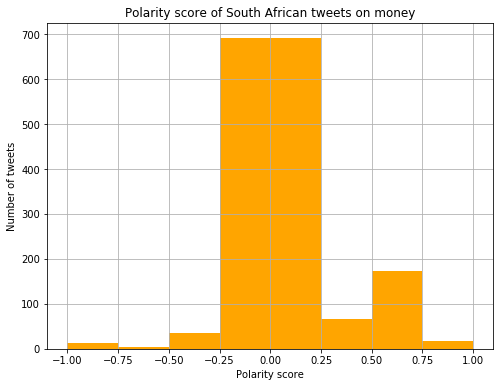

In [15]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(8, 6))

# Plot histogram of the polarity values
sentiment_df.hist(bins=[-1, -0.75, -0.5, -0.25, 0.25, 0.5, 0.75, 1],
             ax=ax,
             color="orange")
ax.set_xlabel('Polarity score')
ax.set_ylabel('Number of tweets')
plt.title("Polarity score of South African tweets on money")
plt.show()

## Histogram of polarity excluding 0's.
### In the revised histogram we see that there are more positive than negative tweets about money.

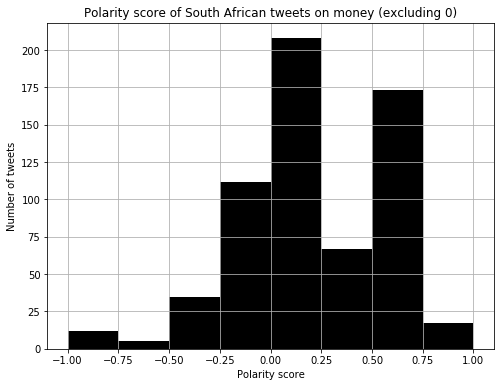

In [16]:
# Remove polarity values equal to zero
sentiment_df1 = sentiment_df[sentiment_df.polarity != 0]
fig, ax = plt.subplots(figsize=(8, 6))

# Plot histogram with break at zero
sentiment_df1.hist(bins=[-1, -0.75, -0.5, -0.25, 0.0, 0.25, 0.5, 0.75, 1],
             ax=ax,
             color="black")
ax.set_xlabel('Polarity score')
ax.set_ylabel('Number of tweets')
plt.title("Polarity score of South African tweets on money (excluding 0)")
plt.show()

## In closing, you should now have the necessary skills to access the twitter API, create a bot for the topic of your choice and interact with other users through your own notebook. You should also have the skills to  be able to search for and store location-based tweets using Tweepy as well as analyse their sentiment using TextBlob.

## Thanks for following my tutorial!

# Nyasha